In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

df_cultura = pd.read_csv("../results_50/raw_results_north_south_china.csv", index_col = [0])
df_cultura = pd.read_csv("../results_50/raw_results.csv", index_col = [0])
df_cultura = pd.read_csv("../results_50/raw_results_north_south.csv", index_col = [0])
df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_min']  =  df_cultura['min_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_max']  =  df_cultura['max_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual

print(len(set(df_cultura.individual_wikidata_id)))

df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'N_est_min':'sum', 'N_est_max':'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura = df_cultura[df_cultura['decade'] <=1850]

df_cultura_world = df_cultura.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_cultura_world['region_name']='world'

df_cultura = pd.concat([df_cultura_world, df_cultura])

df_cultura[df_cultura['region_name']=='Latin World']


FileNotFoundError: [Errno 2] No such file or directory: 'unseen_species_model.csv'

In [ ]:

# df_cultural_latin_world_after = df_cultura[df_cultura['region_name'].isin(['East Slavic',
#                 'Italy',
#                 'Portugal',
#                 'German world',
#                 'United Kingdom',
#                 'Spain',
#                 'Low countries',
#                 'France',
#                 'Central Europe'])]


# df_cultural_latin_world_after = df_cultural_latin_world_after.drop('region_name', axis=1).groupby('decade').sum().reset_index()
# df_cultural_latin_world_after['region_name']='Latin World'
# df_cultural_latin_world_after = df_cultural_latin_world_after[df_cultural_latin_world_after['decade']>500]

# df_cultura = pd.concat([df_cultura, df_cultural_latin_world_after])

list(set(df_cultura['region_name']))


df_western = df_cultura[df_cultura['region_name'].isin([
                'Italy',
                'Portugal',
                'German world',
                'United Kingdom',
                'Spain',
                'Low countries',
                'France',
                'Nordic countries'])]

df_western = df_western.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_western['region_name']='Latin World'
df_western = df_western[df_western['decade']>500]
df_cultura = pd.concat([df_cultura, df_western])


df_greek_latin= df_cultura[df_cultura['region_name'].isin([
                'Latin World', 'Greek World'])]


df_greek_latin = df_greek_latin.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_greek_latin['region_name']='Greek Latin'
#df_western = df_western[df_western['decade']>500]

df_cultura = pd.concat([df_cultura, df_greek_latin])

In [ ]:
# df_cultura = pd.concat([df_cultura, df_cultura_latin_after])
# df_cultura = df_cultura.reset_index(drop=True)


df_cultura_muslim= df_cultura[df_cultura['region_name'].isin(['Arabic world', 'Persian world'])]
df_cultura_muslim['region_name']='MENA'
df_cultura_muslim = df_cultura_muslim.groupby(['region_name', 'decade']).sum().reset_index()
# df_cultura_muslim = df_cultura_muslim[df_cultura_muslim['decade']>500]
df_cultura_muslim

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/369001953.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region_name,decade,N_est,N_est_min,N_est_max,score
0,MENA,-600,5.312871,3.290627,11.391894,1
1,MENA,-400,2.468366,1.983477,3.312445,1
2,MENA,-350,25.742815,19.922451,35.616573,5
3,MENA,-300,33.535516,26.148248,45.664301,6
4,MENA,-250,54.856449,42.472869,75.633249,10
5,MENA,-200,16.721950,12.924141,23.311039,3
6,MENA,-150,17.575478,13.742243,24.029172,3
7,MENA,-100,43.781008,34.854628,57.983694,7
8,MENA,-50,39.719610,31.993824,51.765085,6
9,MENA,0,13.591689,10.944308,17.818640,2


In [ ]:
df_cultura = pd.concat([df_cultura, df_cultura_muslim])
df_cultura = df_cultura.reset_index(drop=True)

In [ ]:
df_pop = pd.read_csv('/Users/charlesdedampierre/Desktop/cultura_project/gdp_analysis/results/population_interpolated_regions.csv', index_col = [0])
df_pop['decade'] = df_pop['year'].apply(lambda x: round(x /50) * 50)
df_pop = df_pop.groupby(['region_name', 'decade'])['pop'].mean().reset_index()

In [ ]:


# df_pop_latin_after = df_pop[df_pop['region_name'].isin(Latin_world_after)]
# df_pop_latin_after['region_name']='Latin World'
# df_pop_latin_after = df_pop_latin_after.groupby(['region_name', 'decade']).sum().reset_index()
# df_pop_latin_after = df_pop_latin_after[df_pop_latin_after['decade']>500]
# df_pop = pd.concat([df_pop, df_pop_latin_after])


df_pop_muslim = df_pop[df_pop['region_name'].isin(['Arabic world','Persian world'])]

df_pop_muslim['region_name']='MENA'
df_pop_muslim = df_pop_muslim.groupby(['region_name', 'decade']).sum().reset_index()
df_pop_muslim = df_pop_muslim[df_pop_muslim['decade']>500]

df_pop = pd.concat([df_pop, df_pop_muslim])
df_pop = df_pop.reset_index(drop=True)

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/3793111182.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pop = False
if pop is True:

    df_cultura= pd.merge(df_cultura, df_pop, on = ['region_name', 'decade'])
    df_cultura['N_est'] = df_cultura['N_est']/ df_cultura['pop']

    df_cultura['N_est'] = df_cultura['N_est']/df_cultura['pop']
    df_cultura['N_est_min'] = df_cultura['N_est_min']/df_cultura['pop']
    df_cultura['N_est_max'] = df_cultura['N_est_max']/df_cultura['pop']

    print('Population updated')

In [ ]:
df_cultura[df_cultura['region_name']=='Latin World']

,decade,N_est,N_est_min,N_est_max,score,region_name
401,-300,2.697387,2.159038,3.591965,1,Latin World
402,-250,4.744345,3.641640,6.592695,1,Latin World
403,-200,33.761550,26.003978,46.938081,7,Latin World
404,-150,52.865110,41.525491,71.451671,11,Latin World
405,-100,214.053186,169.933300,282.882139,34,Latin World
406,-50,278.746703,225.409609,358.320288,45,Latin World
407,0,138.327069,111.998695,177.230537,24,Latin World
408,50,105.780358,85.358738,137.353733,19,Latin World
409,100,153.833703,124.004119,199.534130,28,Latin World
410,150,91.648798,75.426986,116.130223,21,Latin World


In [ ]:
# df_cultura_world = df_cultura.drop('region_name', axis=1).groupby('decade').sum().reset_index()
# df_cultura_world['region_name']='world'


In [ ]:
#df = df_cultura[df_cultura['region_name'].isin(['Chinese world', 'Italy', 'France', 'German world', 'United Kingdom'])]

# Assuming df_cultura is already defined and contains the necessary columns
# df = df_cultura[df_cultura['region_name'].isin(['Italy', 'France','United Kingdom'])]
df = df_cultura[df_cultura['region_name'].isin(['Chinese world', 'Latin World', 'Muslim World', 'Greek World', 'Japan', 'Indian world'])]
df['N_est'] = np.log(df['N_est'])

#df = df[df['decade']>=600]
df = df[df['decade']<=1800]

# Creating a line plot using Plotly Express
fig = px.line(df, x='decade', y='N_est', color='region_name', 
              title='',
              labels={'N_est': 'Estimated Number', 'decade': 'Decade', 'region_name': 'Region'})

# Enhancing the plot with additional settings
fig.update_layout(
    xaxis_title='',
    yaxis_title='Log N_est',
    legend_title='Region',
    template='plotly_white',
    height=800
)

# Show the plot
fig.show()

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/1928412201.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

df = df_cultura.copy()
df = df_cultura[df_cultura['region_name'].isin(['Chinese world', 'Latin World', 'MENA', 'Greek World', 'Japan', 'Indian world', 'East Slavic'])]
df = df[~((df['region_name'] == 'Japan') & (df['decade'] < 600))]


df['region_name'][df['region_name']=='MENA'] = 'West Asia and North Africa'
df['region_name'][df['region_name']=='Latin world'] = 'Western Europe'
df['region_name'][df['region_name']=='East Slavic'] = 'East Slavic World'
df['region_name'][df['region_name']=='Indian world'] = 'Indian World'
df['region_name'][df['region_name']=='Chinese world'] = 'Chinese World'

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/2281911089.py:9: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/2281911089.py:10: FutureWarning:

ChainedAssignm

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13756/1229936418.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



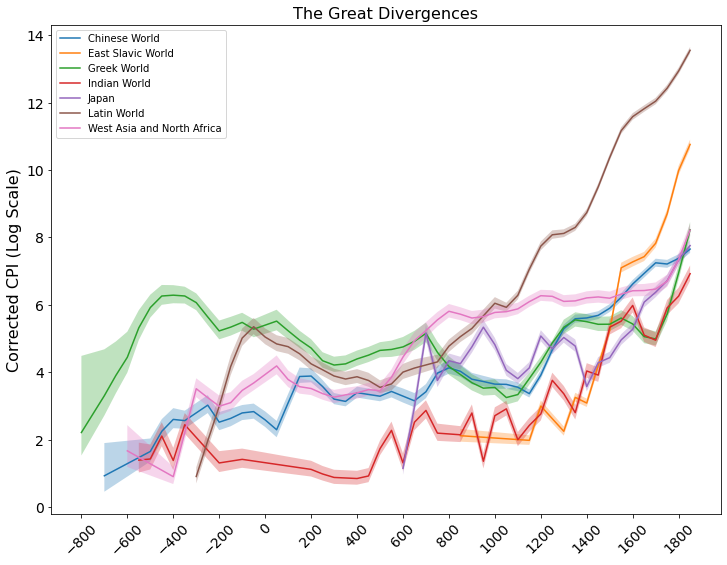

In [ ]:


# Filtering logic
df['N_est'] = np.log(df['N_est'])  # Applying log transformation
df['N_est_min'] = np.log(df['N_est_min'])  # Min bound log
df['N_est_max'] = np.log(df['N_est_max'])  # Max bound log


# # Define your color scheme
# colors = {
#     "Western Europe": "#00008b",
# }

fig, ax = plt.subplots(figsize=(12, 9))

# List for storing text annotations for later adjustment
texts = []

# Calculate the maximum smoothed value for normalization
max_n_est = float('-inf')

# Adding smoothing and plotting for each region
for region in df['region_name'].unique():
    region_data = df[df['region_name'] == region]
    region_data.sort_values(by='decade', inplace=True)


    n = 0.1

    # LOESS smoothing
    smoothed = lowess(region_data['N_est'], region_data['decade'], frac=n)
    smoothed_min = lowess(region_data['N_est_min'], region_data['decade'], frac=n)
    smoothed_max = lowess(region_data['N_est_max'], region_data['decade'], frac=n)

    # Update maximum n_est if current is higher
    max_n_est = max(max_n_est, max(smoothed[:, 1]))

    # Plotting the smoothed mean estimate
    ax.plot(smoothed[:, 0], smoothed[:, 1], label=region)

    # Plotting the confidence interval as a fill between
    ax.fill_between(smoothed[:, 0], smoothed_min[:, 1], smoothed_max[:, 1], alpha=0.3)


# Set the size of x-axis and y-axis tick labels
ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick label size
ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick label size

ax.set_xticks(np.arange(-800, 1801, 200))  # Set x-ticks every 200 years
# Rotating x-ticks by 45 degrees for better readability
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('')
ax.set_ylabel('Corrected CPI (Log Scale)', fontsize = 16)
ax.set_title('The Great Divergences', fontsize = 16)
ax.legend()
plt.show()



In [ ]:
list(set(df_cultura['region_name']))

['Southern China',
 'Southwestern Europe',
 'MENA',
 'Chinese world',
 'Indian world',
 'France',
 'Greek World',
 'world',
 'Italy',
 'Persian world',
 'Portugal',
 'Korea',
 'Latin World',
 'Nordic countries',
 'Greek Latin',
 'German world',
 'Arabic world',
 'Northwestern Europe',
 'Central Europe',
 'Japan',
 'East Slavic',
 'United Kingdom',
 'Low countries',
 'Spain',
 'Northern China']